In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_credit = pd.read_csv('D:/Spyder/Data-Envelopment-Analysis-Excel/Data/churn/archive/BankChurners.csv')

# General information retrival

In [3]:
df_credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df_credit.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

### As already told in the main page that to remove bith the Naive_Bayes columns, lets do that and then we will retirive info

In [5]:
df_credit = df_credit.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [6]:
df_credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
def basic_infos(data):
    print("Dataset shape is: ", data.shape,"\n")
    print("Dataset columns are: ",data.columns,"\n")
    print("Dataset dimensions are:",data.ndim,"\n")
    print("Dataset information is:\n",data.info(),"\n")
    categorical, numerical = [], []
    for i in data.columns:
        if data[i].dtype==object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical datatype columns are: ", [i for i in categorical],"\n")
    print("Numercial datatype columns are: ", [i for i in numerical],"\n")
    return categorical, numerical

In [8]:
cat, num = basic_infos(df_credit)

Dataset shape is:  (10127, 21) 

Dataset columns are:  Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object') 

Dataset dimensions are: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null 

In [9]:
print(df_credit.isnull().sum())

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


# General Exploration

## Attrition_Flag

Attrition_Flag tells us whether the customer is existing or attrited

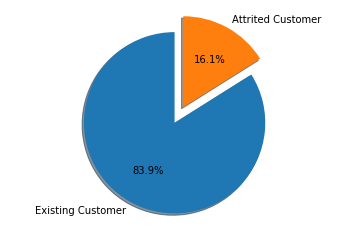

In [10]:
labels = df_credit['Attrition_Flag'].value_counts().index.to_list()
sizes = df_credit['Attrition_Flag'].value_counts()
explode=(0,0.2)
fig, ax=plt.subplots()
ax.pie(sizes, labels = labels, explode = explode, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

We got the info that 16.1 customers are attrited customers

## Customer_Age

Lets see what is the age composition of all credit card users

(array([2.650e+02, 6.540e+02, 1.478e+03, 1.778e+03, 2.422e+03, 1.920e+03,
        9.210e+02, 5.350e+02, 1.520e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <a list of 10 Patch objects>)

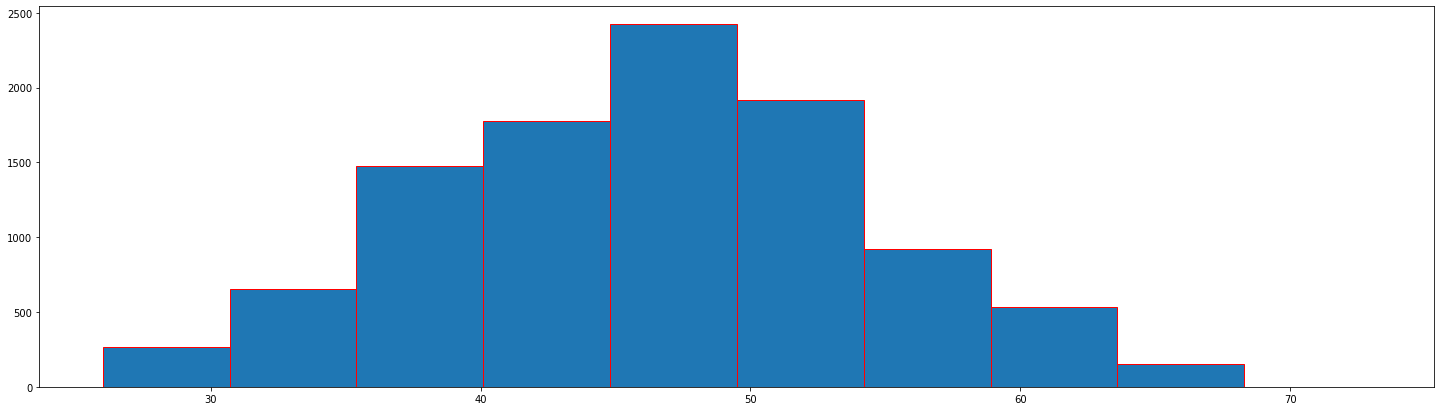

In [11]:
plt.figure(figsize=(25,7))
plt.hist(df_credit['Customer_Age'], edgecolor = 'red')

We can roughly estimate that most of the credit card holders are in the range of age 40 to 55

## Gender 

Lets get how many people of different genders are the credit card holders

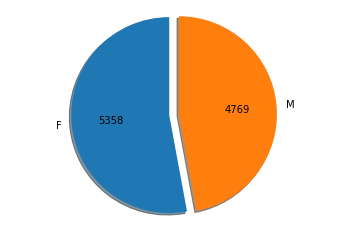

In [12]:
labels = df_credit['Gender'].value_counts().index.to_list()
sizes = df_credit['Gender'].value_counts()
explode=(0,0.1)
fig, ax=plt.subplots()
p, tx, autotexts = ax.pie(sizes, labels = labels, explode = explode, autopct="", shadow=True, startangle=90)
for i, a in enumerate(autotexts):
    a.set_text("{}".format(sizes[i]))
ax.axis('equal')
plt.show()

we can see the number of females and males acquiring credit cards

# Dependent_count

In [13]:
df_credit['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

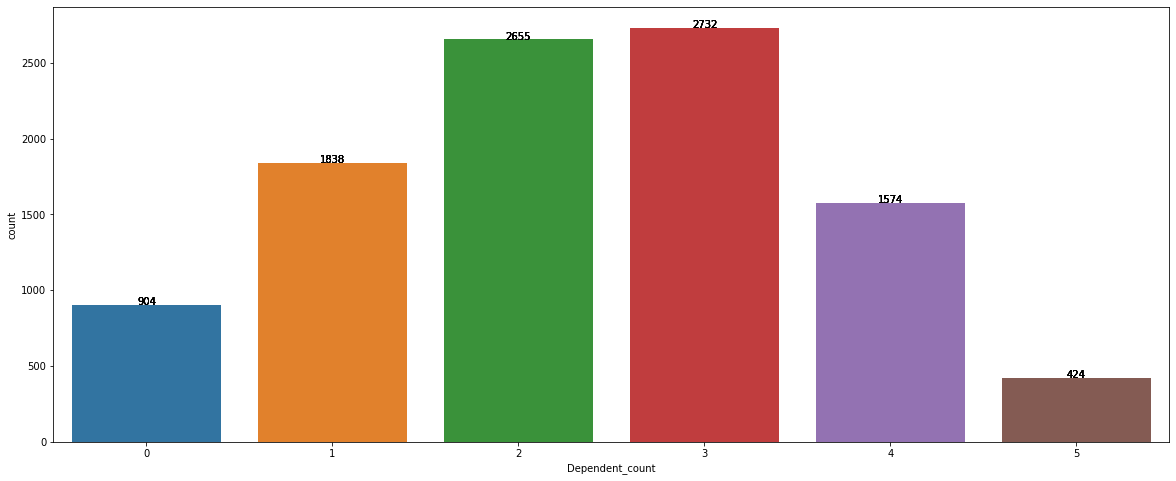

In [14]:
fig, ax = plt.subplots(figsize = (20,8))
graph = sns.countplot(df_credit['Dependent_count'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

# Education_Level

Lets see our holders highest education level

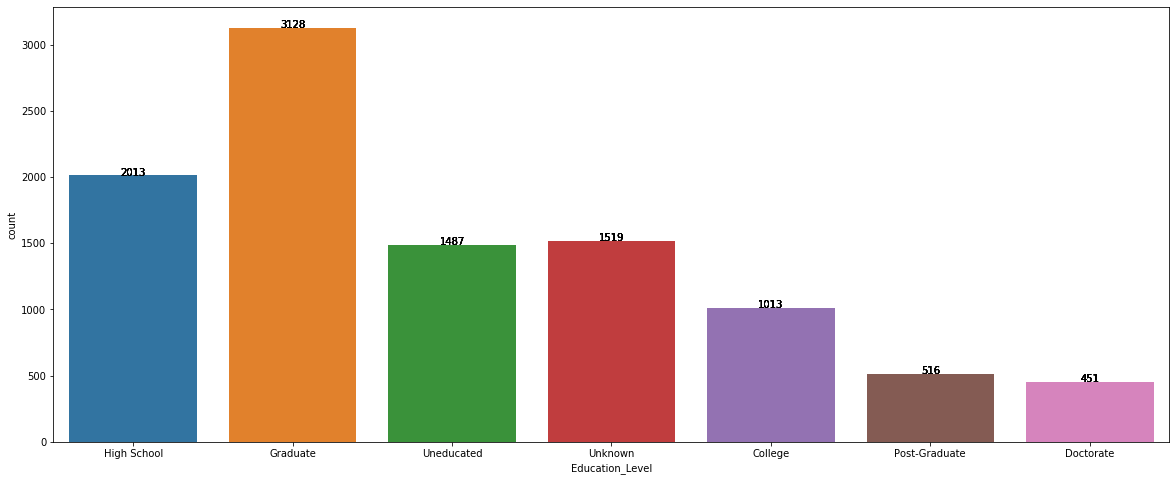

In [15]:
fig, ax = plt.subplots(figsize = (20,8))
graph = sns.countplot(df_credit['Education_Level'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## Marital_Status

Lets know the marital status of the individuals

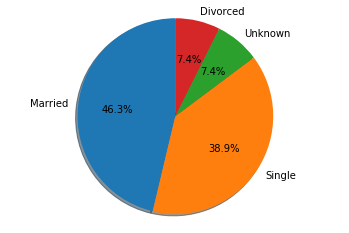

In [16]:
labels = df_credit['Marital_Status'].value_counts().index.to_list()
sizes = df_credit['Marital_Status'].value_counts()
fig, ax=plt.subplots()
ax.pie(sizes, labels = labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

## Income_Category

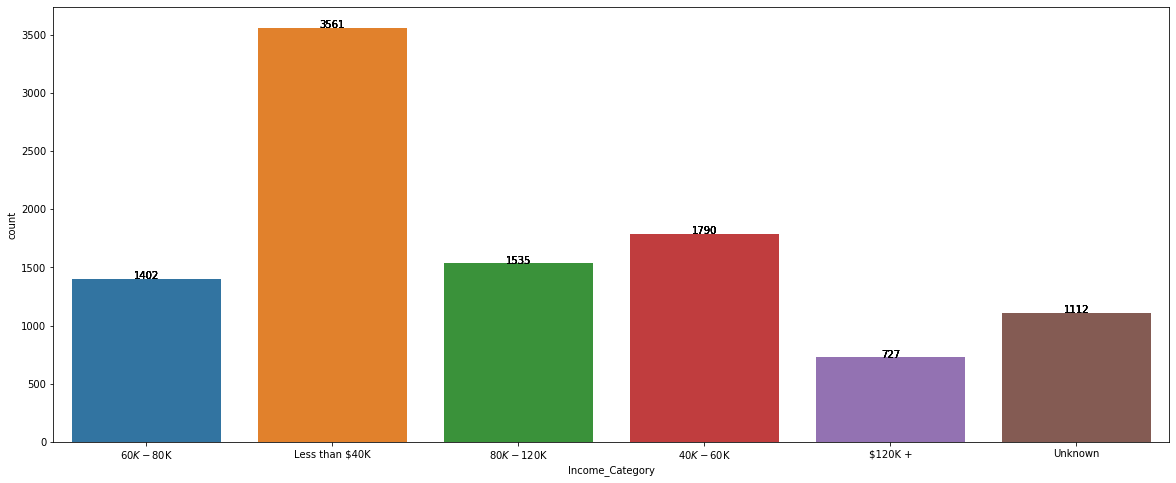

In [17]:
fig, ax = plt.subplots(figsize = (20,8))
graph = sns.countplot(df_credit['Income_Category'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## Card_Category

Lets know what are the types of cards, and whats their composition

To gwt to know about card category, we are gonna use treemap

In [18]:
list(df_credit['Card_Category'].value_counts())

[9436, 555, 116, 20]

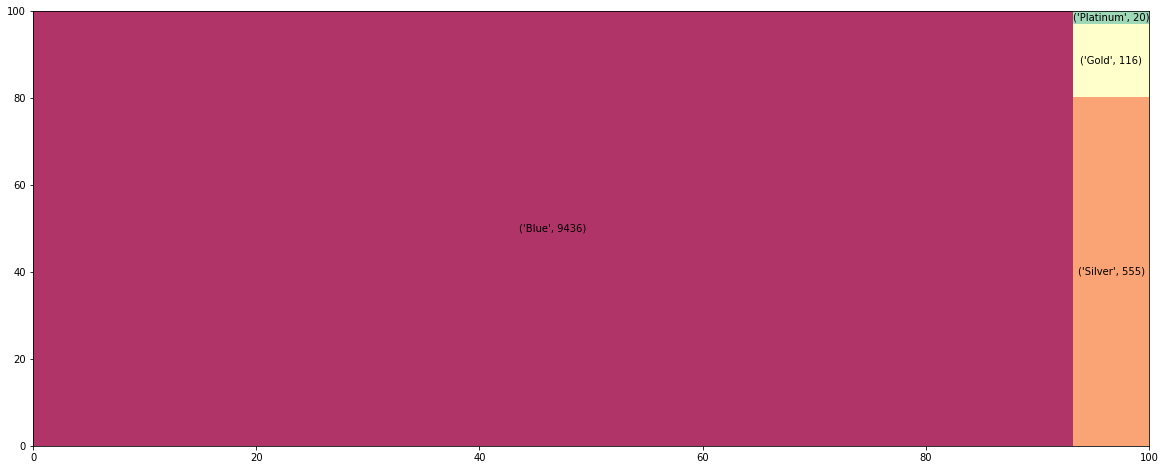

In [19]:
import squarify #for making treemap, we need squarify
plt.figure(figsize=(20,8))
labels=[i for i in zip(df_credit['Card_Category'].value_counts().index.to_list(), list(df_credit['Card_Category'].value_counts()))]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
squarify.plot(sizes=df_credit['Card_Category'].value_counts(),color=colors, label=labels, alpha=.8)

## Months_on_book

(array([ 188.,  278.,  546., 1208., 1265., 3485., 1515.,  825.,  479.,
         338.]),
 array([13. , 17.3, 21.6, 25.9, 30.2, 34.5, 38.8, 43.1, 47.4, 51.7, 56. ]),
 <a list of 10 Patch objects>)

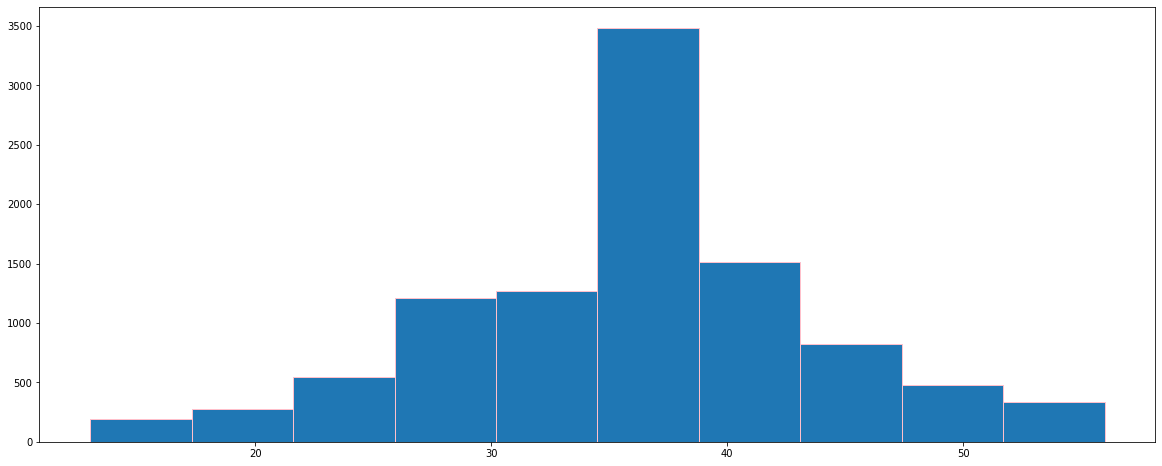

In [20]:
plt.figure(figsize=(20,8))
plt.hist(df_credit['Months_on_book'], edgecolor = 'pink')

## Total_Relationship_Count

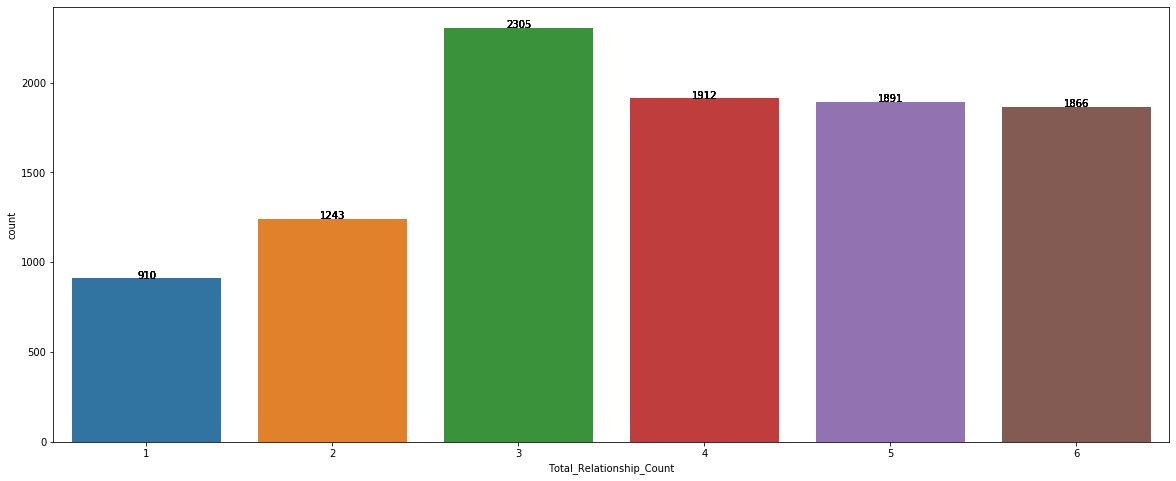

In [21]:
fig, ax = plt.subplots(figsize = (20,8))
graph = sns.countplot(df_credit['Total_Relationship_Count'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## Months_Inactive_12_mon

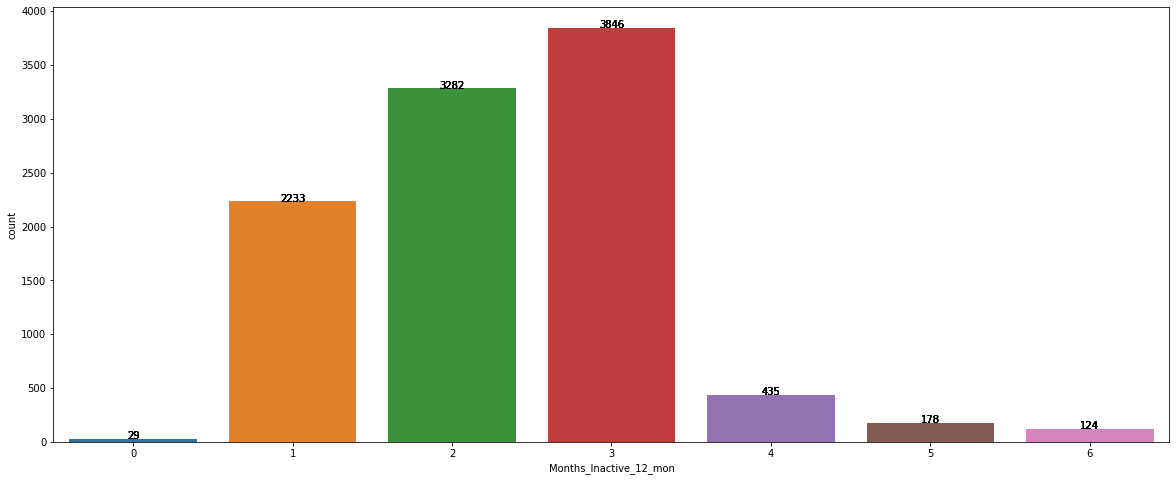

In [22]:
fig, ax = plt.subplots(figsize = (20,8))
graph = sns.countplot(df_credit['Months_Inactive_12_mon'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## Contacts_Count_12_mon

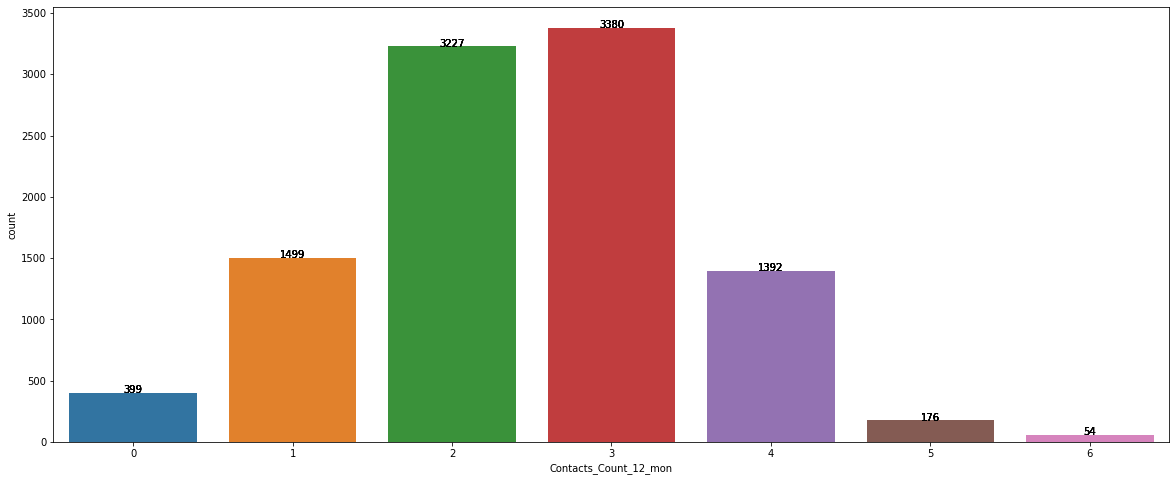

In [23]:
fig, ax = plt.subplots(figsize = (20,8))
graph = sns.countplot(df_credit['Contacts_Count_12_mon'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## Feature Engineering

In [24]:
 cat

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

#### These are the categorical variables, we will now either do encoding or make dummy so as to make them all numerical so that we can plot out heatmap and proceed further

In [25]:
df_credit['Attrition_Flag'] = df_credit['Attrition_Flag'].astype('category')
df_credit['Attrition_Flag'] = df_credit['Attrition_Flag'].cat.codes

In [26]:
df_credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


1 - Existing Customer
0 - Attrited Customer

In [27]:
def making_new_df(data, columnlist):
    for i in columnlist:
        dummy = pd.get_dummies(data[i])
        #print(dummy)
        del dummy[dummy.columns[-1]]
        data = pd.concat([data, dummy], axis = 1)
    return data

In [28]:
df_credit_new = making_new_df(df_credit, cat[1:])

In [29]:
df_credit_new

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Married,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,0,0,0,1,0,0,1,0,0
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0,1,0,0,0,0,1,1,0,0
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,0,0,0,1,0,1,0,0
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0,0,0,0,0,0,1,1,0,0
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0,1,0,1,0,0,0,1,0,0
10123,710638233,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0,0,0,1,0,0,0,1,0,0
10124,716506083,0,44,F,1,High School,Married,Less than $40K,Blue,36,...,1,0,0,0,0,0,1,1,0,0
10125,717406983,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,0,0,1,0,0,0,1,0,0


#### lets make a heatmap so as to get, whats the correlation b/w every other columns. But as we have categorical columns as well, so we will use integer encoding so make them numerical and then make heatmap

In [30]:
corr = df_credit_new.corr(method='pearson')

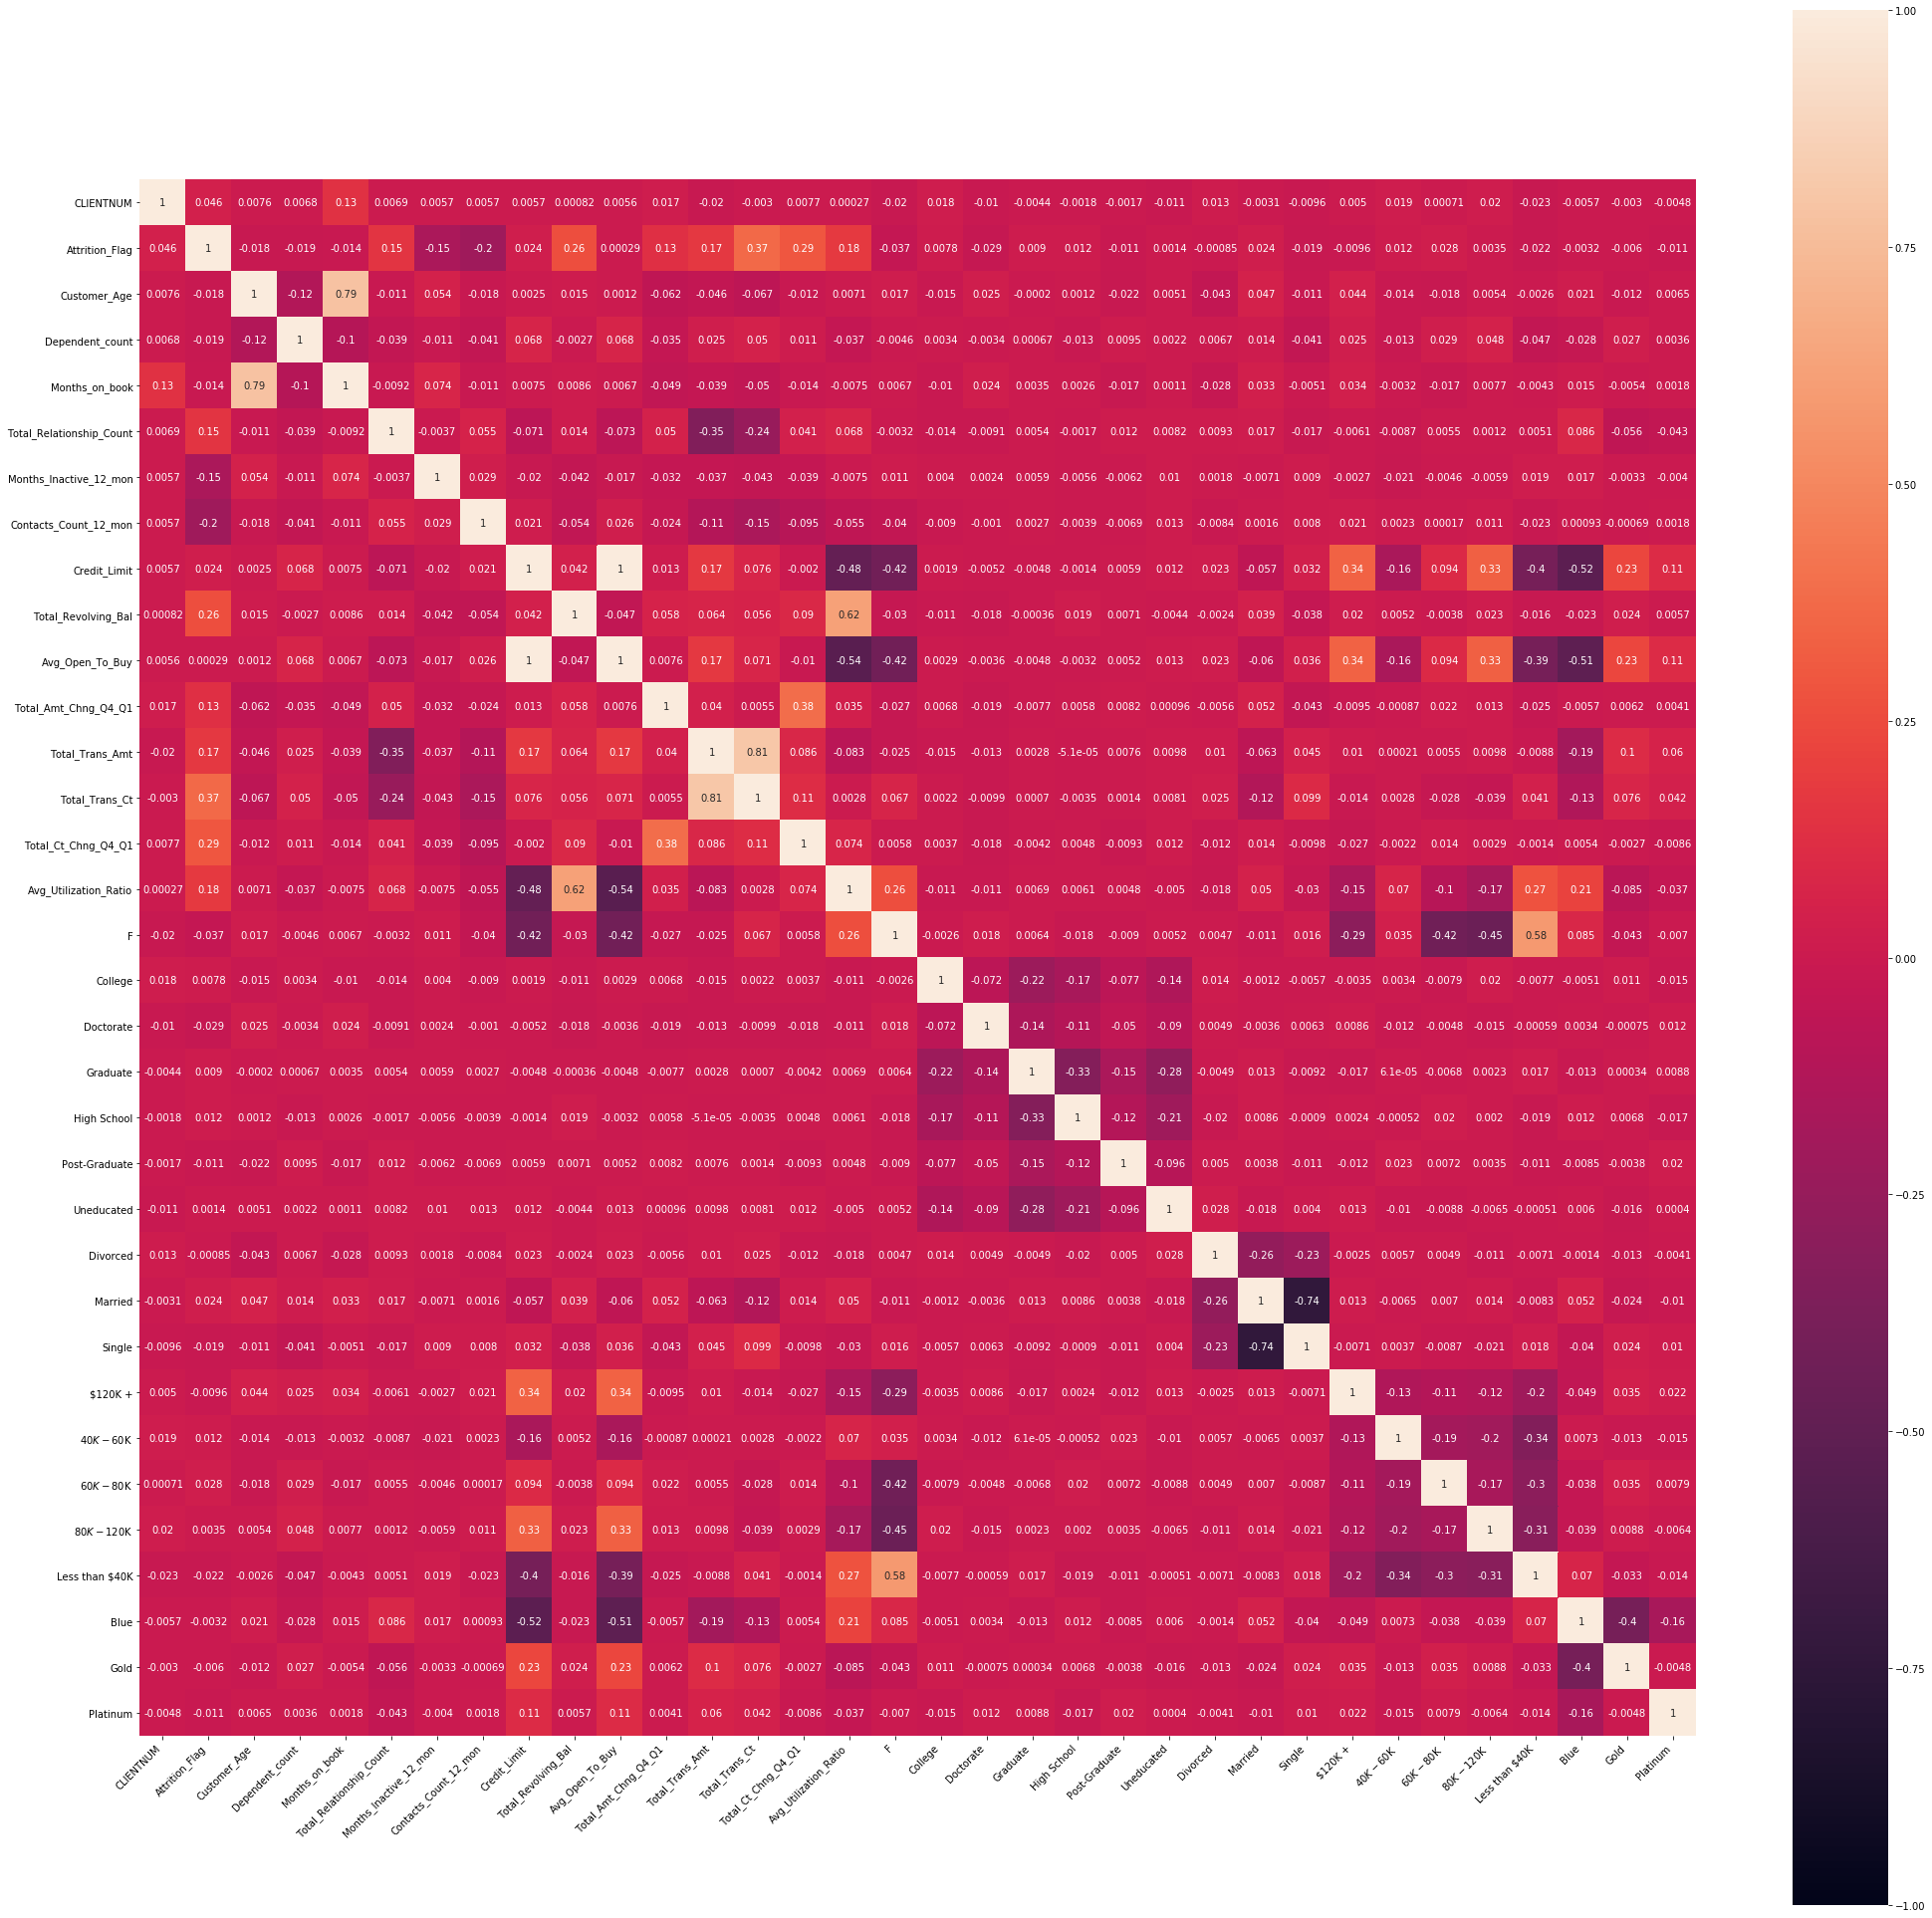

In [31]:
plt.figure(figsize=(35,35))
ax= sns.heatmap(corr, vmin = -1, vmax = 1, square = True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize=10)
plt.show()

#### Even though being informative, its clumsy, so now we will try different method so as to get those upmost independent variables upon which Attrition_Flag depends upon

#### Removing all those categorical columns

In [32]:
df_credit_new = df_credit_new.drop(columns= cat[1:], axis = 1)

In [33]:
df_credit_new

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Married,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum
0,768805383,1,45,3,39,5,1,3,12691.0,777,...,1,0,0,0,1,0,0,1,0,0
1,818770008,1,49,5,44,6,1,2,8256.0,864,...,0,1,0,0,0,0,1,1,0,0
2,713982108,1,51,3,36,4,1,0,3418.0,0,...,1,0,0,0,0,1,0,1,0,0
3,769911858,1,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,0,0,1,1,0,0
4,709106358,1,40,3,21,5,1,0,4716.0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,2,40,3,2,3,4003.0,1851,...,0,1,0,1,0,0,0,1,0,0
10123,710638233,0,41,2,25,4,2,3,4277.0,2186,...,0,0,0,1,0,0,0,1,0,0
10124,716506083,0,44,1,36,5,3,4,5409.0,0,...,1,0,0,0,0,0,1,1,0,0
10125,717406983,0,30,2,36,4,3,3,5281.0,0,...,0,0,0,1,0,0,0,1,0,0


# Feature Selection

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


[0.02813907 0.03156716 0.02535925 0.02860213 0.06091914 0.03834863
 0.04672028 0.0331332  0.09733001 0.03167888 0.04442718 0.12244609
 0.1419181  0.07048205 0.05332033 0.01496657 0.00797393 0.00602766
 0.01256582 0.0113229  0.00628021 0.00969258 0.00614871 0.0133237
 0.0125736  0.00507039 0.00828139 0.00652192 0.00742079 0.00986567
 0.00506382 0.00177089 0.00073795]


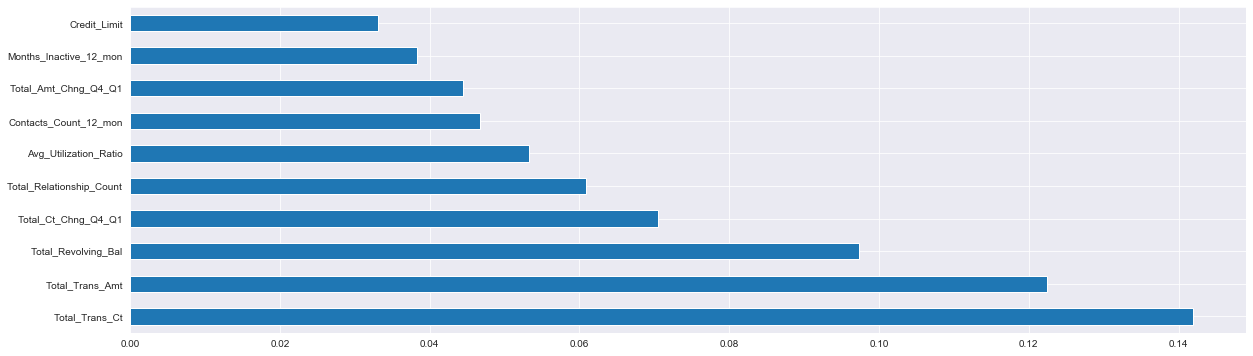

In [34]:
plt.figure(figsize = (20,6))
sns.set_style('darkgrid')

x = df_credit_new.loc[:, df_credit_new.columns !='Attrition_Flag']
y = df_credit_new.loc[:, df_credit_new.columns == 'Attrition_Flag']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = x.columns)
img = feat_importances.nlargest(10).plot(kind = 'barh')
labels1 = feat_importances.nlargest(10).plot(kind = 'barh').get_yticklabels()
plt.show()

In [35]:
required_labels = list()
for i in labels1:
    j = str(i)
    required_labels.append(j[12:len(j)-2])

In [36]:
df_credit_new[required_labels[0]]

0         42
1         33
2         20
3         20
4         28
        ... 
10122    117
10123     69
10124     60
10125     62
10126     61
Name: Total_Trans_Ct, Length: 10127, dtype: int64

# Model Making

### Lets split our model into training and testing set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df_credit_new.loc[:, required_labels]
Y = df_credit_new.iloc[:, 1]

In [39]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int8

In [40]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.25, random_state=42)

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
LR = LogisticRegression()

In [43]:
model_lr = LR.fit(train_x, train_y)

In [44]:
y_lr_predict = model_lr.predict(test_x)

In [45]:
type(y_lr_predict)

numpy.ndarray

In [46]:
LR_df = pd.DataFrame(data = {"Actual": test_y.to_numpy(), "Predicted": y_lr_predict})

In [47]:
LR_df

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2527,1,1
2528,1,1
2529,1,1
2530,1,1


In [48]:
model_lr.score(test_x, test_y)

0.8767772511848341

## Random Forest Classififer

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_rfr = rfc.fit(train_x, train_y)
y_rfr_predict = model_rfr.predict(test_x)
RFR_df = pd.DataFrame(data = {"Actual": test_y, "Predicted": y_rfr_predict})

In [50]:
RFR_df

,Actual,Predicted
3781,1,1
2922,1,1
5070,1,1
7246,1,1
623,1,1
...,...,...
1323,1,1
4161,1,1
1614,1,0
831,1,1


In [51]:
model_rfr.score(test_x, test_y)

0.9605055292259084

## Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gnb = gnb.fit(train_x, train_y)
y_gnb_predict = model_gnb.predict(test_x)
GNB_df = pd.DataFrame(data = {"Actual":test_y, "Predicted": y_gnb_predict})

In [53]:
GNB_df

,Actual,Predicted
3781,1,1
2922,1,1
5070,1,1
7246,1,1
623,1,1
...,...,...
1323,1,0
4161,1,1
1614,1,0
831,1,0


In [54]:
model_gnb.score(test_x, test_y)

0.8811216429699842

## Support Vector Classifier

In [55]:
from sklearn.svm import SVC
svc = SVC()
model_svc = svc.fit(train_x, train_y)
y_svc_predict = model_svc.predict(test_x)
svc_df = pd.DataFrame(data = {"Actual":test_y, "Predicted": y_svc_predict})

In [56]:
svc_df

,Actual,Predicted
3781,1,1
2922,1,1
5070,1,1
7246,1,1
623,1,1
...,...,...
1323,1,1
4161,1,1
1614,1,1
831,1,1


In [57]:
model_svc.score(test_x, test_y)

0.834518167456556

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

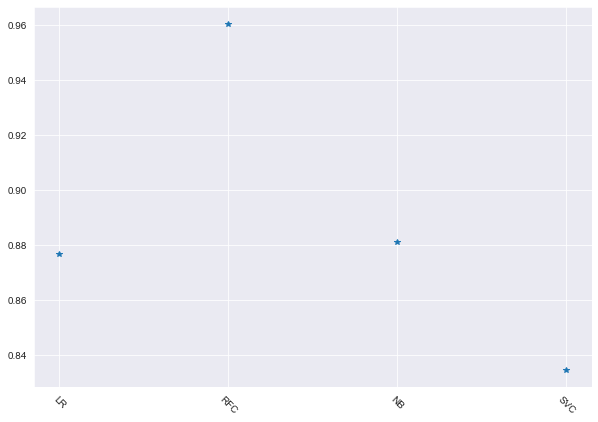

In [66]:
x_axis = ['LR', 'RFC', 'NB', 'SVC']
y_axis = [model_lr.score(test_x, test_y), model_rfr.score(test_x, test_y), model_gnb.score(test_x, test_y), model_svc.score(test_x, test_y)]
plt.figure(figsize = (10,7))
plt.plot(x_axis, y_axis, "*")
plt.xticks(rotation = -45)

## We got the highest accuracy by Random Forest Classifier algorithm.